## In our example we will be using 10-15 hours of traning data

In [ ]:
!pip install datasets soundfile speechbrain accelerate -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.8/824.8 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 kB 36.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


## The dataset



In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from datasets import load_dataset

In [ ]:
# load the dataset
dataset = load_dataset("facebook/voxpopuli", "nl", split="train")

# take random subset of 1/4th of the dataset
subset_size=len(dataset)//8
subset = dataset.shuffle(seed=42).select(range(subset_size))

# verify the subset size
print(f"Original dataset size:", len(dataset))
print(f"Subset dataset size:", len(subset))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:81: UserWarning: 
Access to the secret `HF_TOKEN` has not been granted on this notebook.
You will not be requested again.
Please restart the session if you want to be prompted again.
  warnings.warn(


README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

voxpopuli.py:   0%|          | 0.00/8.84k [00:00<?, ?B/s]

The repository for facebook/voxpopuli contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/facebook/voxpopuli.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


data/n_files.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

asr_train.tsv:   0%|          | 0.00/7.09M [00:00<?, ?B/s]

asr_dev.tsv:   0%|          | 0.00/422k [00:00<?, ?B/s]

asr_test.tsv:   0%|          | 0.00/405k [00:00<?, ?B/s]

train_part_0.tar.gz:   0%|          | 0.00/1.31G [00:00<?, ?B/s]

train_part_1.tar.gz:   0%|          | 0.00/1.35G [00:00<?, ?B/s]

train_part_2.tar.gz:   0%|          | 0.00/1.35G [00:00<?, ?B/s]

train_part_3.tar.gz:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

train_part_4.tar.gz:   0%|          | 0.00/255M [00:00<?, ?B/s]

dev_part_0.tar.gz:   0%|          | 0.00/321M [00:00<?, ?B/s]

test_part_0.tar.gz:   0%|          | 0.00/319M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Original dataset size: 20968
Subset dataset size: 2621


In [ ]:
dataset=subset

In [ ]:
from datasets import Audio

In [ ]:
dataset = dataset.cast_column("audio", Audio(sampling_rate=16_000))

In [ ]:
from transformers import SpeechT5Processor

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
dataset

Dataset({
    features: ['audio_id', 'language', 'audio', 'raw_text', 'normalized_text', 'gender', 'speaker_id', 'is_gold_transcript', 'accent'],
    num_rows: 2621
})

In [ ]:
checkpoint="microsoft/speecht5_tts"
processor=SpeechT5Processor.from_pretrained(checkpoint)

preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
tokenizer=processor.tokenizer

In [ ]:
dataset[0]

{'audio_id': '20150909-0900-PLENARY-13-nl_20150909-19:06:12_8',
 'language': 9,
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/758fc1c7d969d40ffa41243a0bf6bd4062df17379d05c07d7f5177d84a808c76/train_part_3/20150909-0900-PLENARY-13-nl_20150909-19:06:12_8.wav',
  'array': array([0.00045776, 0.009552  , 0.01150513, ..., 0.01168823, 0.00579834,
         0.00259399]),
  'sampling_rate': 16000},
 'raw_text': 'Dat wil ik u vooral meegeven, en vooral de vraag hoe staat het met de implementatie en de controle, een dubbele controle, gezien het verleden.',
 'normalized_text': 'dat wil ik u vooral meegeven en vooral de vraag hoe staat het met de implementatie en de controle een dubbele controle gezien het verleden.',
 'gender': 'male',
 'speaker_id': '4507',
 'is_gold_transcript': True,
 'accent': 'None'}

In [ ]:
dataset

Dataset({
    features: ['audio_id', 'language', 'audio', 'raw_text', 'normalized_text', 'gender', 'speaker_id', 'is_gold_transcript', 'accent'],
    num_rows: 2621
})

In [ ]:
def extract_all_chars(batch):
    all_text = " ".join(batch["normalized_text"])
    vocab=list(set(all_text))
    return {"vocab":[vocab], "all_text":[all_text]}

vocabs = dataset.map(
    extract_all_chars,
    remove_columns=dataset.column_names
)

Map:   0%|          | 0/2621 [00:00<?, ? examples/s]

In [ ]:
len(dataset)

2621

In [ ]:
ds_vocab=[]

In [ ]:
for i in range(0, 1):
    ds_vocab.extend(vocabs["vocab"][i])
print(ds_vocab)

[['i', 'p', 'z', 'g', 'd', 'w', 't', 'b', '.', 'k', 'u', 'a', 'h', 'r', 'n', 'c', 'e', ' ', 'm', 'l', 's', 'v', 'o']]


In [ ]:
# ds_vocab=set(ds_vocab)
tokenizer_vocab = {k for k, _ in tokenizer.get_vocab().items()}

In [ ]:
# ds_vocab-tokenizer_vocab

In [ ]:
replacements={
    ("à", "a"),
    ("ç", "c"),
    ("è", "e"),
    ("ë", "e"),
    ("í", "i"),
    ("ï", "i"),
    ("ö", "o"),
    ("ü", "u"),
}

In [ ]:
def cleanup_text(inputs):
    for src,dst in replacements:
        inputs["normalized_text"] = inputs["normalized_text"].replace(src, dst)
    return inputs

dataset = dataset.map(cleanup_text) # , batched=True, batch_size=32, num_proc=4

Map:   0%|          | 0/2621 [00:00<?, ? examples/s]

In [ ]:
len(dataset)

2621

## Speakers

In [ ]:
from collections import defaultdict

speaker_counts = defaultdict(int)

for speaker_id in subset["speaker_id"]:
    speaker_counts[speaker_id]+=1

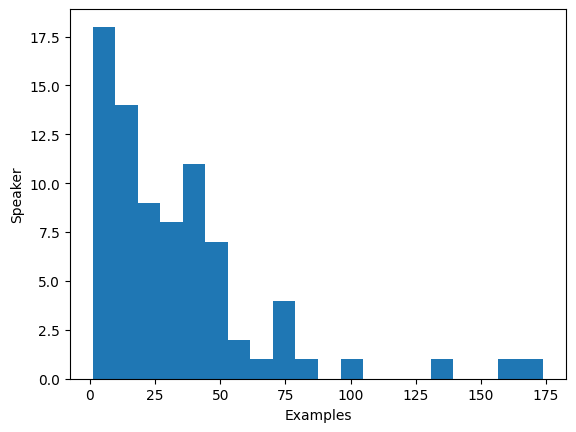

In [ ]:
import matplotlib.pyplot as plt

plt.figure()

plt.hist(speaker_counts.values(), bins=20)

plt.ylabel("Speaker")
plt.xlabel("Examples")
plt.show()

In [ ]:
speaker_counts

defaultdict(int,
            {'4507': 100,
             '4751': 45,
             '197420': 4,
             '96754': 71,
             '24030': 47,
             '183022': 14,
             '28171': 37,
             '28167': 66,
             '96940': 85,
             '125105': 71,
             '25718': 43,
             '197709': 12,
             '117491': 9,
             '197469': 3,
             '96726': 45,
             '1965': 36,
             '96748': 77,
             '190519': 16,
             '103132': 41,
             '197756': 1,
             '117477': 174,
             '125022': 23,
             '58789': 37,
             '95074': 46,
             '96809': 133,
             '4508': 17,
             '28165': 40,
             '38398': 72,
             '130100': 50,
             '1969': 26,
             '197467': 6,
             '96905': 32,
             '124973': 22,
             '125030': 41,
             '197773': 9,
             '125023': 55,
             '28174': 39,
            

In [ ]:
def select_speaker(speaker_id):
    return 100 <= speaker_counts[speaker_id] <=400

dataset = dataset.filter(select_speaker, input_columns=["speaker_id"])

Filter:   0%|          | 0/2621 [00:00<?, ? examples/s]

In [ ]:
len(set(dataset["speaker_id"]))

4

In [ ]:
len(dataset)

569

In [ ]:
import os
import torch
from speechbrain.pretrained import EncoderClassifier

spk_model_name="speechbrain/spkrec-xvect-voxceleb"

<ipython-input-27-c12cdd670ce2>:3: UserWarning: Module 'speechbrain.pretrained' was deprecated, redirecting to 'speechbrain.inference'. Please update your script. This is a change from SpeechBrain 1.0. See: https://github.com/speechbrain/speechbrain/releases/tag/v1.0.0
  from speechbrain.pretrained import EncoderClassifier


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

speaker_model = EncoderClassifier.from_hparams(
    source=spk_model_name,
    savedir=os.path.join("/tmp", spk_model_name)
)

def create_speaker_embedding(waveform):
    with torch.no_grad():
        speaker_embedding = speaker_model.encode_batch(torch.tensor(waveform))
        speaker_embedding = torch.nn.functional.normalize(speaker_embedding, dim=-2)
        speaker_embedding = speaker_embedding.squeeze().cpu().numpy()
    return speaker_embedding

hyperparams.yaml:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/speechbrain/utils/autocast.py:68: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)


embedding_model.ckpt:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/3.20k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/15.9M [00:00<?, ?B/s]

label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/speechbrain/utils/checkpoints.py:200: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path, map_location=device

## Processing the Dataset

In [ ]:
def prepare_dataset(example):
    audio = example["audio"]

    example = processor(
        text=example["normalized_text"],
        audio_target=audio["array"],
        sampling_rate=audio["sampling_rate"],
        return_attention_mask=False
    )

    # strip off the batch dimensions
    example["labels"] = example["labels"][0]
    #  use speechbrain to obtain x-vector

    example["speaker_embeddings"] = create_speaker_embedding(audio["array"])
    return example

In [ ]:
processed_example = prepare_dataset(dataset[0])
list(processed_example.keys())

['input_ids', 'labels', 'speaker_embeddings']

In [ ]:
processed_example["speaker_embeddings"].shape

(512,)

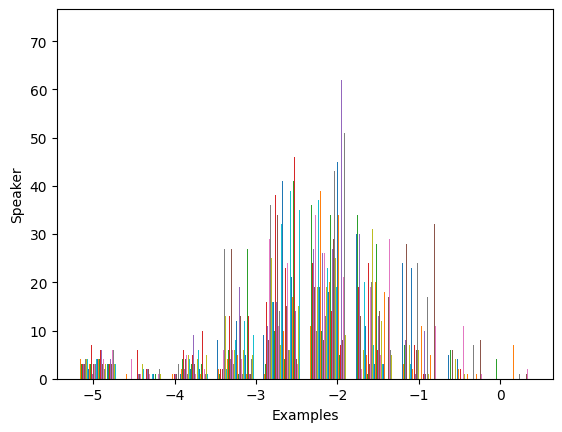

In [ ]:
plt.figure()

plt.hist(processed_example["labels"].T)

plt.ylabel("Speaker")
plt.xlabel("Examples")
plt.show()

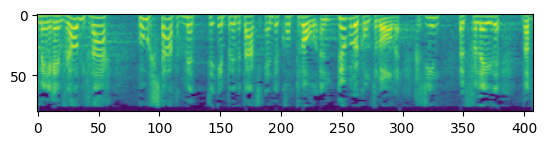

In [ ]:
plt.imshow(processed_example["labels"].T)
plt.show()

In [ ]:
dataset = dataset.map(prepare_dataset, remove_columns=dataset.column_names)

Map:   0%|          | 0/569 [00:00<?, ? examples/s]

In [ ]:
def is_not_too_long(input_ids):
    input_length = len(input_ids)
    return input_length < 200

dataset = dataset.filter(is_not_too_long, input_columns=["input_ids"])
len(dataset)

Filter:   0%|          | 0/569 [00:00<?, ? examples/s]

481

In [ ]:
dataset = dataset.train_test_split(test_size=0.1)

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'labels', 'speaker_embeddings'],
        num_rows: 432
    })
    test: Dataset({
        features: ['input_ids', 'labels', 'speaker_embeddings'],
        num_rows: 49
    })
})

# Data Collator

In [ ]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union

@dataclass
class TTSDataCollatorWithPadding:

    processor: Any

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_ids = [{"input_ids": feature["input_ids"]} for feature in features]
        label_features = [{"input_values": feature["labels"]} for feature in features]
        speaker_features = [feature["speaker_embeddings"] for feature in features]

        # input
        batch = self.processor.pad(
            input_ids=input_ids,
            labels=label_features,
            # padding=self.padding,
            # max_length=self.max_length,
            return_tensors="pt",
        )

        # replace padding with -100 to ignore loss correctly

        batch["labels"] = batch["labels"].masked_fill(
            batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100
        )

        del batch["decoder_attention_mask"]

        if model.config.reduction_factor > 1:
            target_lengths = torch.tensor(
                [len(feature["input_values"]) for feature in label_features]
            )
            target_lengths = target_lengths.new(
                [
                    length - length % model.config.reduction_factor
                    for length in target_lengths
                ]
            )

            max_length = max(target_lengths)
            batch["labels"] = batch["labels"][:, :max_length]

        # also add in speaker embeddings

        batch["speaker_embeddings"] = torch.tensor(speaker_features)

        return batch

## Train the model

In [ ]:
from transformers import SpeechT5ForTextToSpeech

In [ ]:
model = SpeechT5ForTextToSpeech.from_pretrained(checkpoint)

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

In [ ]:
data_collator=TTSDataCollatorWithPadding(processor=processor)
# data_collator(dataset["train"].select(range(4)))

{'input_ids': tensor([[ 4,  6,  5,  9,  4, 12, 15,  8,  6,  6,  5,  4, 18,  8,  5,  6,  5,  9,
          4, 20, 10, 46,  4,  8,  8, 28,  4,  8,  9, 57,  5,  4, 24,  8, 12, 10,
          6, 10,  5,  4,  7, 15, 12,  4, 21, 13,  8,  8,  6, 12,  6,  5,  4,  8,
          9,  6, 20, 10, 28, 28,  5, 15, 10,  9, 21, 12, 14,  8,  9,  8, 13,  4,
         25,  5,  6,  5, 13,  4,  7,  7,  9, 20,  5,  9, 14,  5,  9, 26,  2,  1,
          1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1],
        [ 4, 14,  7,  6,  4, 13,  5, 17, 11,  6,  4, 20,  8, 13, 14,  6,  4, 21,
          5, 12, 17, 11,  8,  9, 14,  5,  9, 26,  2,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 

In [ ]:
from functools import partial

model.config.use_cache = False

model.generate = partial(model.generate, use_cache=True)

In [ ]:
from transformers import Seq2SeqTrainingArguments


training_args = Seq2SeqTrainingArguments(
    output_dir="speecht5_finetuned_voxpopuli_nl",
    per_device_train_batch_size=8,
    gradient_accumulation_steps=4,
    learning_rate=1e-4,
    warmup_steps=200,
    max_steps=600,
    gradient_checkpointing=True,
    fp16=True,
    evaluation_strategy="steps",
    per_device_eval_batch_size=4,
    # group_by_length=True,
    save_steps=200,
    eval_steps=200,
    logging_steps=50,
    load_best_model_at_end=True,
    greater_is_better=False,
    label_names=["labels"],
    push_to_hub=False,
    report_to=None
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    data_collator=data_collator,
    tokenizer=processor
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
max_steps is given, it will override any value given in num_train_epochs


In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


Step,Training Loss,Validation Loss
200,0.542200,0.502056
400,0.488800,0.494561
600,0.466400,0.493585


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 1876}
Your generation config was originally created from the model config, but the model config has changed since then. Unless you pass the `generation_config` argument to this model's `generate` calls, they will revert to the legacy behavior where the base `generate` parameterization is loaded from the model config instead. To avoid this behavior and this warning, we recommend you to overwrite the generation config model attribute before calling the model's `save_pretrained`, preferably also removing any generation kwargs from the model config. This warning will be raised to an exception in v4.41.
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/e

TrainOutput(global_step=600, training_loss=0.5368551063537598, metrics={'train_runtime': 1154.2882, 'train_samples_per_second': 16.634, 'train_steps_per_second': 0.52, 'total_flos': 2856585795402240.0, 'train_loss': 0.5368551063537598, 'epoch': 44.44444444444444})